In [1]:
import tensorflow as tf

def setup_gpu_memory_growth():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            # 打印异常信息
            print(e)

# 在程序的开始调用这个函数
setup_gpu_memory_growth()

# 以下是你的其他TensorFlow代码


In [2]:
import os

# 设置环境变量
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

# 现在可以运行你的TensorFlow代码了


In [3]:
import tensorflow as tf

In [4]:
from keras.optimizers import Adam

In [5]:
import dlmodels

In [6]:
import tensorflow.keras.models as models

In [7]:
import tensorflow.keras.optimizers as optimizers

In [8]:
import tensorflow.keras.utils as kutils

In [9]:
import sklearn.ensemble

In [10]:
import sklearn.metrics

In [11]:
import rasterio

In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [14]:
import pandas

In [15]:
import os

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
# SEED = 42
# np.random.seed(SEED)

In [18]:
import keras
from keras import losses
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten


In [19]:
from fusion import create_model

In [20]:
#import fusion  ######改成py！！！！

In [21]:
#####optical private/thesis_data/code/final_code/dataset/LABEL_100_DIR

In [22]:
####改了label目录

In [23]:
import os

# 定义数据集目录
BASE_DIR = "/home/jovyan/private/thesis_data/code/final_code/dataset"
# 假设您有三个不同的目录，分别存储不同类型的图像
S1_IMAGE_DIR = os.path.join(BASE_DIR, "resample_sentinel")
S2_10_IMAGE_DIR = os.path.join(BASE_DIR, "sentinel1_sentinel2_10")
S2_20_IMAGE_DIR = os.path.join(BASE_DIR, "sentinel2_20_images_normalized")
GEDI_IMAGE_DIR = os.path.join(BASE_DIR, "gedi_101")
LABEL_250_DIR_normalized = os.path.join(BASE_DIR, "LABEL_250_DIR")
LABEL_100_DIR_normalized = os.path.join(BASE_DIR, "LABEL_100_DIR")


# 定义常量

BATCH_SIZE = 14
EPOCHS = 100
#STEPS = 1000

# 定义测试和验证图像的文件名



In [24]:
TRAIN_IMAGES = ['9_3.tif', '27_2.tif','11_5.tif', '25_7.tif','18_3.tif', '21_6.tif',  '17_5.tif',  '7_3.tif', '4_3.tif', 
                '12_1.tif', '15_8.tif', '15_9.tif', '10_4.tif', '21_3.tif', '6_6.tif', '11_3.tif', '19_6.tif', '17_3.tif', 
                '2_1.tif', '18_5.tif', '24_2.tif','9_2.tif', '21_1.tif', '19_7.tif', '19_3.tif', '20_7.tif', '7_2.tif', '27_4.tif',
                '18_6.tif', '2_5.tif', '20_8.tif','25_1.tif', '16_3.tif','24_8.tif', '22_2.tif', '2_3.tif', '4_2.tif', '12_2.tif', '10_3.tif', 
                '4_6.tif', '9_5.tif',  '18_4.tif', '15_6.tif', '22_6.tif','24_6.tif', '17_7.tif', '7_5.tif', '4_4.tif', 
                '10_5.tif', '9_1.tif', '20_5.tif', '17_4.tif', '19_1.tif', '6_2.tif', '22_5.tif', '7_1.tif', '27_6.tif','27_5.tif',
                '6_3.tif', '16_2.tif', '18_2.tif', '6_5.tif','25_3.tif', '16_5.tif', '11_1.tif', '2_2.tif', '16_4.tif', '7_4.tif', '27_8.tif',
                '19_2.tif','25_5.tif', '17_6.tif', '21_2.tif','24_4.tif', '4_5.tif', '9_4.tif', '20_9.tif', '20_6.tif', '2_4.tif', '22_1.tif', 
                '15_5.tif','25_9.tif', '11_2.tif', '10_6.tif', '21_7.tif', '12_7.tif', '11_4.tif','24_1.tif']


In [25]:
VAL_IMAGES = ['18_9.tif','27_3.tif', '7_7.tif', '20_3.tif', '18_7.tif', '2_8.tif', '4_8.tif', '18_8.tif', 
              '12_5.tif', '20_1.tif', '19_4.tif', '17_8.tif','24_3.tif', '21_8.tif', '17_2.tif', '9_6.tif', 
              '9_8.tif', '17_1.tif', '19_5.tif','25_2.tif', '4_7.tif', '10_2.tif',  '16_8.tif', '25_4.tif',
              '21_9.tif', '24_9.tif','22_3.tif', '11_8.tif', '10_8.tif', '2_6.tif', '19_8.tif', '6_8.tif', 
              '21_5.tif', '7_8.tif', '20_2.tif', '10_9.tif', '25_8.tif','12_4.tif', '12_8.tif', '4_9.tif', 
              '9_7.tif','27_7.tif',  '7_6.tif', '16_7.tif','24_7.tif', '15_4.tif', '11_9.tif', '16_6.tif', 
              '2_7.tif', '22_8.tif', '11_7.tif', '27_1.tif']


In [26]:
TEST_IMAGES = ['9_9.tif', '3_7.tif', '17_9.tif', '8_8.tif', '15_1.tif', '18_1.tif', '2_9.tif', '8_5.tif', '3_9.tif', 
               '21_4.tif', '7_9.tif', '4_1.tif', '3_3.tif', '3_6.tif', '3_5.tif', '3_2.tif', '6_9.tif', '11_6.tif', 
               '8_2.tif', '8_3.tif', '8_4.tif', '3_8.tif', '8_6.tif', '8_9.tif', '3_1.tif', '20_4.tif', '22_9.tif', 
               '8_7.tif', '3_4.tif', '8_1.tif', '10_1.tif', '16_9.tif', '19_9.tif']


In [27]:
###删除了24，25，27“

In [28]:
patch_sizes = {"s1": (224, 224), "s2_10": (224, 224),"s2_20":(112,112), "gedi": (28, 28), "LABEL_250_DIR_normalized": (9, 9), "LABEL_100_DIR_normalized": (23, 23)}
bands_count = {"s1": 2, "s2_10": 6,"s2_20":6,"gedi":101 }
label_dirs = ['LABEL_250_DIR_normalized', 'LABEL_100_DIR_normalized']
image_dirs = {"s1":S1_IMAGE_DIR,"s2_10":S2_10_IMAGE_DIR,"s2_20":S2_20_IMAGE_DIR, "gedi":GEDI_IMAGE_DIR }

In [29]:
#####read multiband image

In [30]:
import rasterio
import numpy as np

def read_and_preprocess_image(image_path, normalise_percentiles=(1, 99)):
    with rasterio.open(image_path) as image_file:
        image_arr = image_file.read()  # 读取所有波段，以[通道, 高度, 宽度]的格式
        
        # 替换nodata和异常值为np.nan
        if image_file.nodata is not None:
            image_arr = np.where(image_arr == image_file.nodata, np.nan, image_arr)
        
        # 处理可能的极端负值
        image_arr = np.where(
            (image_arr == -1.7976931348623157e+308) | (image_arr == -3.4028234663852886e+38),
            np.nan,
            image_arr
        )
        
        # 归一化
        if normalise_percentiles:
            for band in range(image_arr.shape[0]):
                band_arr = image_arr[band, :, :]
                min_val = np.nanpercentile(band_arr, normalise_percentiles[0])
                max_val = np.nanpercentile(band_arr, normalise_percentiles[1])

                if max_val - min_val > np.finfo(float).eps:
                    norm_band = (band_arr - min_val) / (max_val - min_val)
                    norm_band = np.clip(norm_band, 0, 1)  # 确保范围在0到1之间
                    image_arr[band, :, :] = norm_band
                else:
                    image_arr[band, :, :] = np.zeros_like(band_arr)
        
        # 转换NaN为0，并处理无穷大的值
        image_arr = np.nan_to_num(image_arr, nan=0.0, posinf=0.0, neginf=0.0)

    # 重新排序维度为[高度, 宽度, 通道]
    return image_arr.transpose(1, 2, 0)


In [31]:
#恢复了归一化

In [56]:

def read_single_band_image(image_path, normalise_percentiles=(1, 99)):
    with rasterio.open(image_path) as image_file:
        image_arr = image_file.read(1)  # 读取第一个波段

        # 替换 nodata 值为 np.nan
        if image_file.nodata is not None:
            image_arr[image_arr == image_file.nodata] = np.nan
        
        # 替换可能的异常值为 np.nan
        image_arr = np.where(
            (image_arr == -1.7976931348623157e+308) | (image_arr == -3.4028234663852886e+38),
            np.nan,
            image_arr
        )

        # 归一化到 0 到 1 之间
        if normalise_percentiles:
            min_val = np.nanpercentile(image_arr, normalise_percentiles[0])
            max_val = np.nanpercentile(image_arr, normalise_percentiles[1])
            
            if max_val - min_val > np.finfo(float).eps:
                image_arr = (image_arr - min_val) / (max_val - min_val)
                # 确保归一化后的值在 0 到 1 之间
                image_arr = np.clip(image_arr, 0, 1)
            else:
                # 如果 min 和 max 相同，创建全 0 数组
                image_arr = np.zeros_like(image_arr)
        
        # 将 np.nan 转换为 0
        single_band_image = np.nan_to_num(image_arr, nan=0.0)

    # 添加通道维度并返回
    return np.expand_dims(single_band_image, axis=-1)  # 维度 (高度, 宽度, 1)


In [33]:
#反归一化：在某些情况下，特别是回归问题中，你可能需要将预测结果“反归一化”回原始的数值范围，以便结果更易于理解和使用。这要求保存归一化过程中使用的参数（如最小值和最大值），以便在预测后进行逆操作。

In [34]:
#####别忘了patch

In [35]:
def pad_image_to_patch_size(image, patch_size):
    height, width, depth = image.shape
    patch_height, patch_width = patch_size

    # 目标高度和宽度
    target_height = patch_height * (height // patch_height + (1 if height % patch_height != 0 else 0))
    target_width = patch_width * (width // patch_width + (1 if width % patch_width != 0 else 0))

    # 计算填充量
    pad_height = (target_height - height) // 2
    pad_width = (target_width - width) // 2

    # 创建填充后的图像
    padded = np.zeros((target_height, target_width, depth), dtype=image.dtype)
    padded[pad_height:pad_height + height, pad_width:pad_width + width, :] = image

    padding_info = {
        'padded_height': target_height,
        'padded_width': target_width,
        'top_pad': pad_height,
        'left_pad': pad_width
    }

    return padded, padding_info


In [36]:
# def pad_image_to_patch_size(image, patch_size):
#     height, width, depth = image.shape
#     patch_height, patch_width = patch_size  # 解包元组，分别获取补丁的高度和宽度

#     # 计算目标高度和宽度
#     target_height = patch_height * (height // patch_height + (1 if height % patch_height != 0 else 0))
#     target_width = patch_width * (width // patch_width + (1 if width % patch_width != 0 else 0))

#     # 计算填充量
#     pad_height = (target_height - height) // 2
#     pad_width = (target_width - width) // 2

#     # 创建填充后的图像
#     padded = np.zeros((target_height, target_width, depth), dtype=image.dtype)
#     padded[pad_height:pad_height + height, pad_width:pad_width + width, :] = image

#     return padded, (pad_height, pad_width)


In [37]:
class TrainSequence(kutils.Sequence):
    def __init__(self, filenames, batch_size, patch_sizes, bands_count, len, label_dirs):
        self.filenames = filenames
        self.batch_size = batch_size
        self.patch_sizes = patch_sizes  # 字典，包含每种图像和标签的补丁大小
        self.bands_count = bands_count  # 字典，包含每种图像类型的波段数
        self.len = len
        self.label_dirs = label_dirs# 列表，包含标签的目录
        self.read_dataset()

    def read_dataset(self):
        self.data = []
        for filename in self.filenames:
            # 读取和处理图像
            s1_image_path = os.path.join(S1_IMAGE_DIR, filename)
            s2_10_image_path = os.path.join(S2_10_IMAGE_DIR, filename)
            s2_20_image_path = os.path.join(S2_20_IMAGE_DIR, filename)
            gedi_image_path = os.path.join(GEDI_IMAGE_DIR, filename)
            
            #s1_image = read_and_preprocess_image(s1_image_path, normalise=True)
            s1_image = read_and_preprocess_image(s1_image_path)

            
            s2_10_image = read_and_preprocess_image(s2_10_image_path)
            s2_20_image = read_and_preprocess_image(s2_20_image_path)
            gedi_image = read_and_preprocess_image(gedi_image_path)
            
            # Pad each image according to its patch size
            s1_image, _ = pad_image_to_patch_size(s1_image, self.patch_sizes['s1'])
            s2_10_image, _ = pad_image_to_patch_size(s2_10_image, self.patch_sizes['s2_10'])
            s2_20_image, _ = pad_image_to_patch_size(s2_20_image, self.patch_sizes['s2_20'])
            gedi_image, _ = pad_image_to_patch_size(gedi_image, self.patch_sizes['gedi'])


            images = {'s1': s1_image, 's2_10': s2_10_image, 's2_20':s2_20_image, 'gedi': gedi_image}

            # 读取和处理标签
            labels = []
            for label_type in self.label_dirs:
                label_path = os.path.join(BASE_DIR, label_type, filename)
                label = read_single_band_image(label_path)
                # 使用 label_type 作为键来获取对应的补丁大小
                label, _ = pad_image_to_patch_size(label, self.patch_sizes[label_type])
                labels.append(label)


            self.data.append((images, labels))
    
    
    def on_epoch_end(self):
        # 打乱数据
        np.random.shuffle(self.data)

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        batch_x = {key: np.empty((self.batch_size, *self.patch_sizes[key], self.bands_count[key])) for key in ['s1', 's2_10', 's2_20', 'gedi']}
        batch_y = [np.empty((self.batch_size, *self.patch_sizes[label_dir], 1)) for label_dir in self.label_dirs]

        for patch_index in range(self.batch_size):
            images, labels = self.sample_image()

            # 基于参考图像（例如s1）计算采样起始点的比例
            ref_image = images['s1']
            y_ratio, x_ratio = self.calculate_sampling_start_point(ref_image, self.patch_sizes['s1'])

            for key, image in images.items():
                patch_size = self.patch_sizes[key]
                batch_x[key][patch_index] = self.sample_patch(image, patch_size, y_ratio, x_ratio).astype(np.float32)

            for i, label_dir in enumerate(self.label_dirs):
                label = labels[i]
                label_patch_size = self.patch_sizes[label_dir]
                batch_y[i][patch_index] = self.sample_patch(label, label_patch_size, y_ratio, x_ratio).astype(np.float32)
     
        batch_x_tensors = {key: tf.convert_to_tensor(batch_x[key], dtype=tf.float32) for key in batch_x}
        batch_y_tensors = [tf.convert_to_tensor(label_batch, dtype=tf.float32) for label_batch in batch_y]

        return batch_x_tensors, batch_y_tensors

    def sample_image(self):
        # 随机选择一个图像和标签集
        image_index = np.random.choice(len(self.data))
        selected_data = self.data[image_index]
        images = selected_data[0]  # 第一个元素是图像的字典
        labels = selected_data[1]  # 第二个元素是标签的列表
        # 打印选中的image_index
        #print("Selected image index:", image_index)
        return images, labels  # 返回图像字典和标签列表

    def sample_patch(self, image, patch_size, y_ratio, x_ratio):
        # 根据提供的比例和补丁大小采样补丁
        height, width, _ = image.shape
        y_start = int((height - patch_size[0]) * y_ratio)
        x_start = int((width - patch_size[1]) * x_ratio)
        return image[y_start:y_start + patch_size[0], x_start:x_start + patch_size[1], :]

    def calculate_sampling_start_point(self, reference_image, reference_patch_size):
        # 基于参考图像和参考补丁大小计算采样起始点的比例
        height, width, _ = reference_image.shape
        y_ratio = np.random.uniform(0, 1 - reference_patch_size[0] / height)
        x_ratio = np.random.uniform(0, 1 - reference_patch_size[1] / width)
        return y_ratio, x_ratio

In [35]:
train_sequence = TrainSequence(TRAIN_IMAGES, BATCH_SIZE, patch_sizes, bands_count, 3400, label_dirs)

In [36]:
x,y=train_sequence[0]

In [37]:
import numpy as np

def check_nan_or_inf_in_batch(data):
    #"""检查批次数据中是否包含NaN或Inf值。"""
    if isinstance(data, dict):
        # 如果数据是字典类型，则遍历每个键
        for key, value in data.items():
            if np.any(np.isnan(value)) or np.any(np.isinf(value)):
                return True
    elif isinstance(data, list):
        # 如果数据是列表
        for item in data:
            if isinstance(item, np.ndarray):
                if np.any(np.isnan(item)) or np.any(np.isinf(item)):
                    return True
            else:
                # 对于嵌套的列表或其它结构，需要进一步检查或适当处理
                pass
    elif isinstance(data, np.ndarray):
        # 对于直接的NumPy数组
        if np.any(np.isnan(data)) or np.any(np.isinf(data)):
            return True
    return False


# 假设 train_sequence 是你的 TrainSequence 实例
for idx in range(len(train_sequence)):
    batch_x, batch_y = train_sequence[idx]  # 获取批次数据
    
    # 检查特征数据和标签数据中是否有 NaN 或 Inf 值
    if check_nan_or_inf_in_batch(batch_x):
        print(f"NaN or Inf detected in features of batch {idx}")
    if check_nan_or_inf_in_batch(batch_y):
        print(f"NaN or Inf detected in labels of batch {idx}")


In [38]:
# 对 x 进行检查，这里假设 x 是一个列表或数组的列表
for i, item in enumerate(x):
    if isinstance(item, np.ndarray) and np.isnan(item).any():
        print(f"NaN value detected in x at index {i}")

# 对 y 进行检查，这里假设 y 是一个列表或数组的列表
for i, item in enumerate(y):
    if isinstance(item, np.ndarray) and np.isnan(item).any():
        print(f"NaN value detected in y at index {i}")


In [39]:
# 打印x的类型和内容示例
print(type(y))


<class 'list'>


In [40]:
print(type(x))

<class 'dict'>


In [41]:
import tensorflow as tf

for img in y:
    # 使用 TensorFlow 的函数获取最小值和最大值
    min_val = tf.reduce_min(img)
    max_val = tf.reduce_max(img)
    print(f"Data type: {img.dtype}, min: {min_val.numpy()}, max: {max_val.numpy()}")


Data type: <dtype: 'float32'>, min: 0.0, max: 0.8224989175796509
Data type: <dtype: 'float32'>, min: 0.011482201516628265, max: 0.8235729932785034


In [42]:
for key, img in x.items():
    print(f"Key: {key}, Data type: {img.dtype}")


Key: s1, Data type: <dtype: 'float32'>
Key: s2_10, Data type: <dtype: 'float32'>
Key: s2_20, Data type: <dtype: 'float32'>
Key: gedi, Data type: <dtype: 'float32'>


In [43]:
# import matplotlib.pyplot as plt

# def plot_images_and_labels(x, y, batch_size):
#     # 计算绘图的总行数：所有输入图像的波段总数 + 所有输出的数量
#     nrows = sum(img_set.shape[3] for img_set in x.values()) + len(y)
#     ncols = batch_size  # 显示每个批次样本的不同列

#     # 创建一个大的subplot grid
#     fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 2 * nrows))

#     row = 0
#     for col in range(batch_size):
#         # 绘制输入图像
#         for key, img_set in x.items():
#             for band in range(img_set.shape[3]):
#                 ax = axes[row, col]
#                 # 选择特定波段和批次中的图像进行显示
#                 ax.imshow(img_set[col, :, :, band], cmap='gray')
#                 ax.set_title(f"{key} Band {band + 1}")
#                 ax.axis('off')
#                 row += 1

#         # 重置 row 变量，以确保在绘制标签之前它被正确设置为零
#         row = 0

#         # 绘制标签
#         for label_index, label_set in enumerate(y):
#             ax = axes[row, col]
#             # 显示标签图像，假设标签是单通道的
#             ax.imshow(label_set[col, :, :, 0], cmap='gray')
#             ax.set_title(f"Label {label_index + 1}")
#             ax.axis('off')
#             row += 1

#     plt.tight_layout()
#     plt.show()

# # 示例使用
# # 假设 x 和 y 已经准备好，并且每个 batch 包含的样本数量为 BATCH_SIZE
# plot_images_and_labels(x, y, 3)


In [44]:
val_sequence =TrainSequence(VAL_IMAGES,BATCH_SIZE, patch_sizes, bands_count, 2000, label_dirs)

In [45]:
x,y=val_sequence[0]
import tensorflow as tf

for img in y:
    # 使用 TensorFlow 的函数获取最小值和最大值
    min_val = tf.reduce_min(img)
    max_val = tf.reduce_max(img)
    print(f"Data type: {img.dtype}, min: {min_val.numpy()}, max: {max_val.numpy()}")


Data type: <dtype: 'float32'>, min: 0.0025061373598873615, max: 0.9275009036064148
Data type: <dtype: 'float32'>, min: 0.00209697219543159, max: 0.9310811161994934


In [46]:
# 假设 train_sequence 是你的 TrainSequence 实例
for idx in range(len(val_sequence)):
    batch_x, batch_y = val_sequence[idx]  # 获取批次数据
    
    # 检查特征数据和标签数据中是否有 NaN 或 Inf 值
    if check_nan_or_inf_in_batch(batch_x):
        print(f"NaN or Inf detected in features of batch {idx}")
    if check_nan_or_inf_in_batch(batch_y):
        print(f"NaN or Inf detected in labels of batch {idx}")

In [47]:
# import matplotlib.pyplot as plt

# x,y=val_sequence[1]
# # x 是一个列表，y 是一个标签列表的列表
# # 假设x中的顺序与bands_count中的键顺序一致

# # 计算绘图的总行数：所有输入的波段数 + 所有输出的数量
# input_band_count = sum(bands_count.values())
# output_label_count = sum(len(labels) for labels in y)
# nrows = input_band_count + output_label_count
# ncols = 1  # 因为我们只查看第一个批次的数据

# fig, axes = plt.subplots(nrows, ncols, figsize=(5, nrows * 2), squeeze=False)

# current_row = 0
# # 可视化每个输入图像的所有波段
# for input_index, (input_key, band_count) in enumerate(bands_count.items()):
#     for band_index in range(band_count):
#         ax = axes[current_row, 0]
#         ax.imshow(x[input_index][0, :, :, band_index], cmap='gray')
#         ax.axis('off')
#         ax.set_title(f'Input: {input_key}, Band: {band_index + 1}')
#         current_row += 1

# # 可视化每个输出标签
# for label_set_index, label_set in enumerate(y):  # y 是标签列表的列表
#     for label_index, label_data in enumerate(label_set):
#         ax = axes[current_row, 0]
#         ax.imshow(label_data[:, :, 0], cmap='viridis')  # 这里做了修正
#         ax.axis('off')
#         ax.set_title(f'Output Label Set: {label_set_index + 1}, Label: {label_index + 1}')
#         current_row += 1

# plt.tight_layout()
# plt.show()


In [48]:
#val_sequence = ValSequence(VAL_IMAGES, BATCH_SIZE, patch_sizes, bands_count, label_dirs)

In [38]:
# 设置输入尺寸
input_shape_s1 = 224,224,2  # Sentinel-1 输入尺寸
input_shape_s10 = 224,224,6  # Sentinel-2 输入尺寸
input_shape_s20 = 112,112,6  # Sentinel-2 输入尺寸
input_shape_gedi = 28, 28, 101  # GEDI 输入尺寸

In [39]:
model = create_model(input_shape_s1, input_shape_s10, input_shape_s20, input_shape_gedi)

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 s2_20 (InputLayer)             [(None, 112, 112, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_32 (Conv2D)             (None, 112, 112, 64  3520        ['s2_20[0][0]']                  
                                )                                                                 
                                                                                                  
 batch_normalization_32 (BatchN  (None, 112, 112, 64  256        ['conv2d_32[0][0]']              
 ormalization)                  )                                                             

In [41]:
print(model)

In [42]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

In [43]:
#plot_model(model, to_file='model_newresnet.png', show_shapes=True, show_layer_names=True)

In [44]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras.losses import MeanAbsoluteError

In [46]:
import tensorflow as tf
from tensorflow.keras import backend as K


# 定义损失函数字典，使用自定义损失函数
losses1 = {
    'output_250': "mae",  # 使用自定义的损失函数
    'output_100': "mae"   # 同上
}

# 损失权重保持不变
loss_weights1 = {
    'output_250': 0.5,
    'output_100': 0.5
}


In [47]:
from keras import backend as K

In [48]:
def rmse2(y_true, y_pred):
    rmse = K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
    return rmse

In [49]:
# 自定义 R² 指标函数
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [50]:
def custom_mae(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

In [51]:
import numpy as np
from tensorflow.keras.callbacks import Callback

class DetectNaNCallback(Callback):
    def on_batch_end(self, batch, logs=None):
        weights = self.model.get_weights()
        if any(np.isnan(w).any() for w in weights):
            print(f'NaN detected in weights at batch {batch}')
            self.model.stop_training = True

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.get_weights()
        if any(np.isnan(w).any() for w in weights):
            print(f'NaN detected in weights at epoch {epoch}')
            self.model.stop_training = True


In [52]:
 optimizer1 = keras.optimizers.Adam(1e-5,  epsilon=1e-4)
model.compile(optimizer=optimizer1, loss=losses1, loss_weights=loss_weights1, metrics=[rmse2,r_squared,'mse'])

In [63]:
#model.load_weights("/home/jovyan/private/thesis_data/code/final_code/weight/5_5/14_mae_best_model_weights.h5")

In [64]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 初始化回调函数
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # 监控的值
    factor=0.1,          # 学习率减少的因子
    patience=5,         # 在减少学习率之前，等待几个epoch
    min_lr=0.0000001       # 学习率的下限
)


In [65]:
####学习率调整试一下

In [66]:
nan_detect_callback = DetectNaNCallback()


In [72]:
from tensorflow.keras.callbacks import EarlyStopping

# 定义早停规则
early_stopping = EarlyStopping(
    monitor='val_loss',  # 监控的指标，常见的有'val_loss'和'val_accuracy'
    min_delta=0.0001,  # 表示被监控指标的最小变化量，只有大于这个值时才认为模型有改善
    patience=10,  # 指定在监控指标没有改善的情况下等待的epochs数量
    verbose=1,  # 控制输出，1表示输出早停信息
    mode='min',  # 在监控指标为'val_loss'时，我们希望其最小化，因此设置为'min'。如果监控指标为'val_accuracy'，则设置为'max'
    restore_best_weights=True  # 当早停发生时，是否恢复到最好的模型权重
)



In [68]:
from keras.callbacks import ModelCheckpoint

# 设置ModelCheckpoint回调函数来保存验证损失最小的模型权重
model_checkpoint_callback = ModelCheckpoint(
    filepath='/home/jovyan/private/thesis_data/code/final_code/weight/5_15/best_model_weights.h5',  # 保存文件的路径
    save_weights_only=True,  # True表示只保存模型的权重，False则保存整个模型
    monitor='val_loss',  # 被监控的数据
    mode='min',  # 在'min'模式下，监控数据的减少被认为是改进
    save_best_only=True  # True表示只保存在验证集上性能最好的模型
)


In [69]:
#model.load_weights('/home/jovyan/private/thesis_data/code/final_code/weight/newmodel_mse_sample_15_norm_0425_3_1e-3_best_model_weights.h5')

In [70]:
# import gc

# del model  # 删除模型变量
# gc.collect()  # 清理内存


In [73]:
history= model.fit(
    train_sequence, 
    epochs=70,
    batch_size=BATCH_SIZE, 
    verbose=1,  
    validation_data=val_sequence,
    callbacks=[ model_checkpoint_callback,reduce_lr,early_stopping ]
)

Epoch 1/70
3400/3400 [==============================] - 3202s 942ms/step - loss: 0.0105 - output_250_loss: 0.0097 - output_100_loss: 0.0098 - output_250_rmse2: 0.0686 - output_250_r_squared: 0.8143 - output_250_mae: 0.0686 - output_250_custom_mae: 0.0686 - output_100_rmse2: 0.0686 - output_100_r_squared: 0.8127 - output_100_mae: 0.0686 - output_100_custom_mae: 0.0686 - val_loss: 0.0112 - val_output_250_loss: 0.0104 - val_output_100_loss: 0.0104 - val_output_250_rmse2: 0.0723 - val_output_250_r_squared: 0.8158 - val_output_250_mae: 0.0723 - val_output_250_custom_mae: 0.0723 - val_output_100_rmse2: 0.0726 - val_output_100_r_squared: 0.8153 - val_output_100_mae: 0.0726 - val_output_100_custom_mae: 0.0726 - lr: 0.0010
Epoch 2/70
3400/3400 [==============================] - 3209s 944ms/step - loss: 0.0102 - output_250_loss: 0.0094 - output_100_loss: 0.0096 - output_250_rmse2: 0.0668 - output_250_r_squared: 0.8207 - output_250_mae: 0.0668 - output_250_custom_mae: 0.0668 - output_100_rmse2: 0

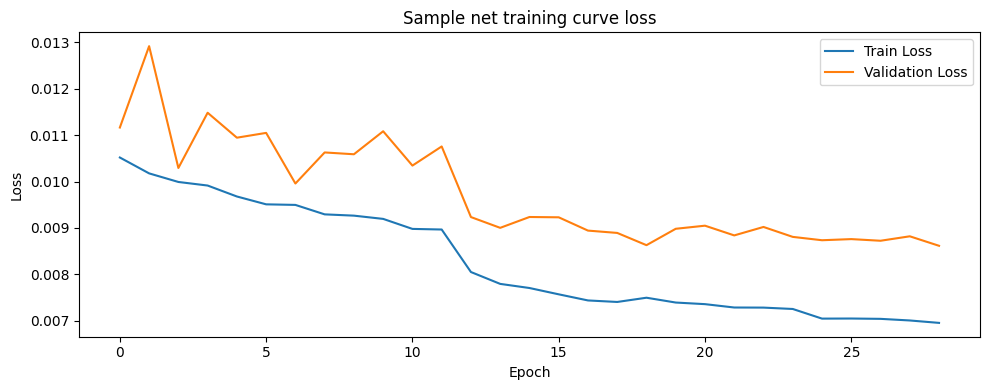

In [74]:
# plot model training history
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

# 绘制损失曲线
axs.set_title("Sample net training curve loss")
axs.plot(history.history["loss"], label="Train Loss")
axs.plot(history.history["val_loss"], label="Validation Loss")
axs.legend()
axs.set_ylabel("Loss")
axs.set_xlabel("Epoch")



plt.tight_layout()
plt.show()


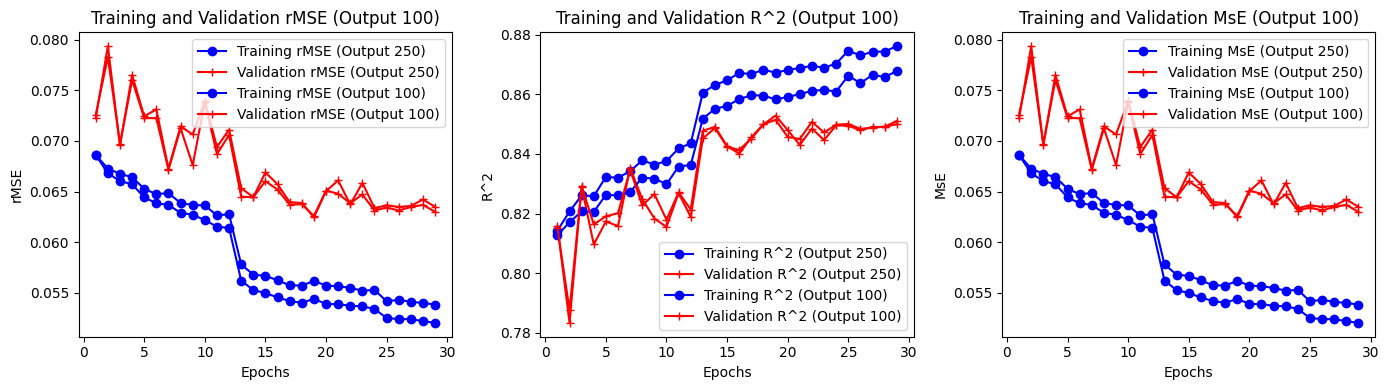

In [366]:
import matplotlib.pyplot as plt

# 定义一个函数来绘制训练历史曲线
def plot_history(metric, val_metric, title, ylabel):
    epochs = range(1, len(metric) + 1)
    plt.plot(epochs, metric, 'bo-', label='Training ' + title)
    plt.plot(epochs, val_metric, 'r+-', label='Validation ' + title)
    plt.title('Training and Validation ' + title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()

# 获取历史数据
epochs = range(1, len(history.history['output_250_mae']) + 1)

# MSE
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plot_history(history.history['output_250_rmse2'], history.history['val_output_250_rmse2'], 'rMSE (Output 250)', 'rMSE')
plot_history(history.history['output_100_rmse2'], history.history['val_output_100_rmse2'], 'rMSE (Output 100)', 'rMSE')

# R^2
plt.subplot(1, 3, 2)
plot_history(history.history['output_250_r_squared'], history.history['val_output_250_r_squared'], 'R^2 (Output 250)', 'R^2')
plot_history(history.history['output_100_r_squared'], history.history['val_output_100_r_squared'], 'R^2 (Output 100)', 'R^2')

# MAE
plt.subplot(1, 3, 3)
plot_history(history.history['output_250_mae'], history.history['val_output_250_mae'], 'MsE (Output 250)', 'MsE')
plot_history(history.history['output_100_mae'], history.history['val_output_100_mae'], 'MsE (Output 100)', 'MsE')

plt.tight_layout()
plt.show()


In [ ]:
#val_sequence.reset()

In [72]:
# save the weight of the trained network
#model.save_weights("/home/jovyan/private/thesis_data/code/final_code/weight/5_5/14_mae_best_model_weights.h5")

In [53]:
model.load_weights("/home/jovyan/private/thesis_data/code/final_code/weight/5_5/mae_best_model_weights.h5")

In [57]:
test_sequence =TrainSequence(TEST_IMAGES,BATCH_SIZE, patch_sizes, bands_count, 1500, label_dirs)

In [58]:
#test_sequence = ValSequence(TEST_IMAGES, BATCH_SIZE, patch_sizes, bands_count, ['LABEL_250_DIR', 'LABEL_100_DIR'])

In [59]:
results = model.evaluate(test_sequence, verbose=1)

print(f"\nTest loss: {results[0]:.4f}")
print(f"Output 250 Loss: {results[1]:.4f}")
print(f"Output 100 Loss: {results[2]:.4f}")
print(f"Output 250 RMSE: {results[3]:.4f}")
print(f"Output 250 R^2: {results[4]:.4f}")
print(f"Output 250 MAE: {results[5]:.4f}")
print(f"Output 100 RMSE: {results[6]:.4f}")
print(f"Output 100 R^2: {results[7]:.4f}")
print(f"Output 100 MAE: {results[8]:.4f}")


1500/1500 [==============================] - 351s 183ms/step - loss: 0.1118 - output_250_loss: 0.1104 - output_100_loss: 0.1132 - output_250_rmse2: 0.1104 - output_250_r_squared: 0.6938 - output_250_mse: 0.0266 - output_100_rmse2: 0.1132 - output_100_r_squared: 0.6743 - output_100_mse: 0.0286

Test loss: 0.1118
Output 250 Loss: 0.1104
Output 100 Loss: 0.1132
Output 250 RMSE: 0.1104
Output 250 R^2: 0.6938
Output 250 MAE: 0.0266
Output 100 RMSE: 0.1132
Output 100 R^2: 0.6743
Output 100 MAE: 0.0286


In [ ]:
# save the weight of the trained network
#model.save_weights("/home/jovyan/private/thesis_data/code/final_code/weight/0403_3_2e-3_25.h5")

In [60]:
TEST_IMAGES1= ['9_9.tif', '17_9.tif', '15_1.tif', '18_1.tif', '2_9.tif', '21_4.tif', '4_1.tif', '6_9.tif', '11_6.tif', '20_4.tif', '22_9.tif', '5_6.tif', '10_1.tif', '16_9.tif', '19_9.tif']


In [61]:
test_sequence =TrainSequence(TEST_IMAGES1,BATCH_SIZE, patch_sizes, bands_count, 600, label_dirs)

In [62]:
results = model.evaluate(test_sequence, verbose=1)

print(f"\nTest loss: {results[0]:.4f}")
print(f"Output 250 Loss: {results[1]:.4f}")
print(f"Output 100 Loss: {results[2]:.4f}")
print(f"Output 250 RMSE: {results[3]:.4f}")
print(f"Output 250 R^2: {results[4]:.4f}")
print(f"Output 250 MAE: {results[5]:.4f}")
print(f"Output 100 RMSE: {results[6]:.4f}")
print(f"Output 100 R^2: {results[7]:.4f}")
print(f"Output 100 MAE: {results[8]:.4f}")


600/600 [==============================] - 109s 182ms/step - loss: 0.1087 - output_250_loss: 0.1092 - output_100_loss: 0.1081 - output_250_rmse2: 0.1092 - output_250_r_squared: 0.7031 - output_250_mse: 0.0264 - output_100_rmse2: 0.1081 - output_100_r_squared: 0.7106 - output_100_mse: 0.0259

Test loss: 0.1087
Output 250 Loss: 0.1092
Output 100 Loss: 0.1081
Output 250 RMSE: 0.1092
Output 250 R^2: 0.7031
Output 250 MAE: 0.0264
Output 100 RMSE: 0.1081
Output 100 R^2: 0.7106
Output 100 MAE: 0.0259


In [63]:
TEST_IMAGES2=['3_7.tif', '8_8.tif', '8_5.tif', '3_9.tif','3_3.tif', '3_6.tif', '3_5.tif', '3_2.tif', '8_2.tif', 
 '8_3.tif', '8_4.tif', '3_8.tif', '8_6.tif', '8_9.tif', '3_1.tif', '8_7.tif', '3_4.tif', '8_1.tif']


In [269]:
test_sequence2 =TrainSequence(TEST_IMAGES2,BATCH_SIZE, patch_sizes, bands_count, 1000, label_dirs)

In [270]:
results = model.evaluate(test_sequence2, verbose=1)

print(f"\nTest loss: {results[0]:.4f}")
print(f"Output 250 Loss: {results[1]:.4f}")
print(f"Output 100 Loss: {results[2]:.4f}")
print(f"Output 250 RMSE: {results[3]:.4f}")
print(f"Output 250 R^2: {results[4]:.4f}")
print(f"Output 250 MAE: {results[5]:.4f}")
print(f"Output 100 RMSE: {results[6]:.4f}")
print(f"Output 100 R^2: {results[7]:.4f}")
print(f"Output 100 MAE: {results[8]:.4f}")


1000/1000 [==============================] - 184s 184ms/step - loss: 0.1114 - output_250_loss: 0.1085 - output_100_loss: 0.1141 - output_250_rmse2: 0.1085 - output_250_r_squared: 0.6694 - output_250_mse: 0.0252 - output_100_rmse2: 0.1141 - output_100_r_squared: 0.6286 - output_100_mse: 0.0288

Test loss: 0.1114
Output 250 Loss: 0.1085
Output 100 Loss: 0.1141
Output 250 RMSE: 0.1085
Output 250 R^2: 0.6694
Output 250 MAE: 0.0252
Output 100 RMSE: 0.1141
Output 100 R^2: 0.6286
Output 100 MAE: 0.0288


In [78]:
predictions = model.predict(test_sequence)

1500/1500 [==============================] - 370s 221ms/step


In [79]:
actuals_250 = []
actuals_100 = []
for i in range(len(test_sequence)):
    _, labels = test_sequence[i]
    actuals_250.append(labels[0])  # 假设第一个标签对应 output_250
    actuals_100.append(labels[1])  # 假设第二个标签对应 output_100

# 转换为 numpy 数组以方便处理
import numpy as np
actuals_250 = np.concatenate(actuals_250, axis=0)
actuals_100 = np.concatenate(actuals_100, axis=0)


In [80]:
def sample_data(predictions, actuals, sample_size=10):
    if len(predictions) > sample_size:
        indices = np.random.choice(len(predictions), sample_size, replace=False)
        return predictions[indices], actuals[indices]
    return predictions, actuals

sampled_predictions_250, sampled_actuals_250 = sample_data(predictions[0], actuals_250)
sampled_predictions_100, sampled_actuals_100 = sample_data(predictions[1], actuals_100)


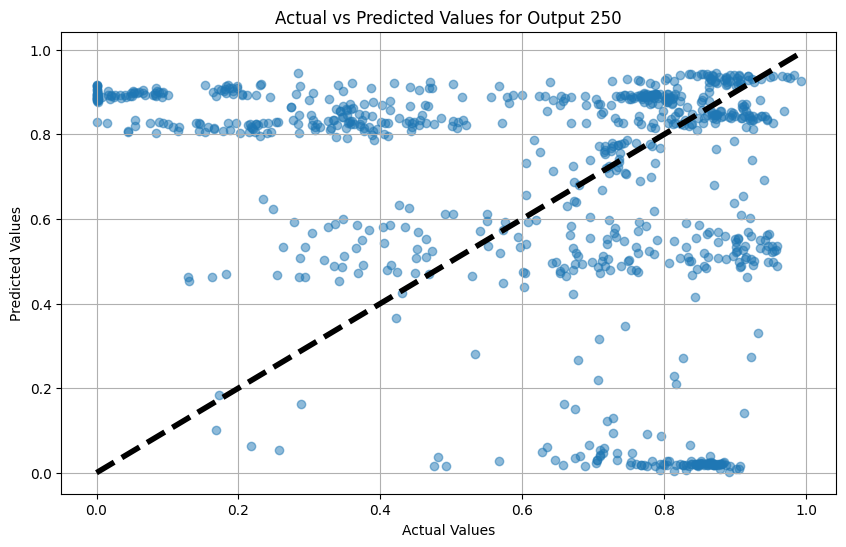

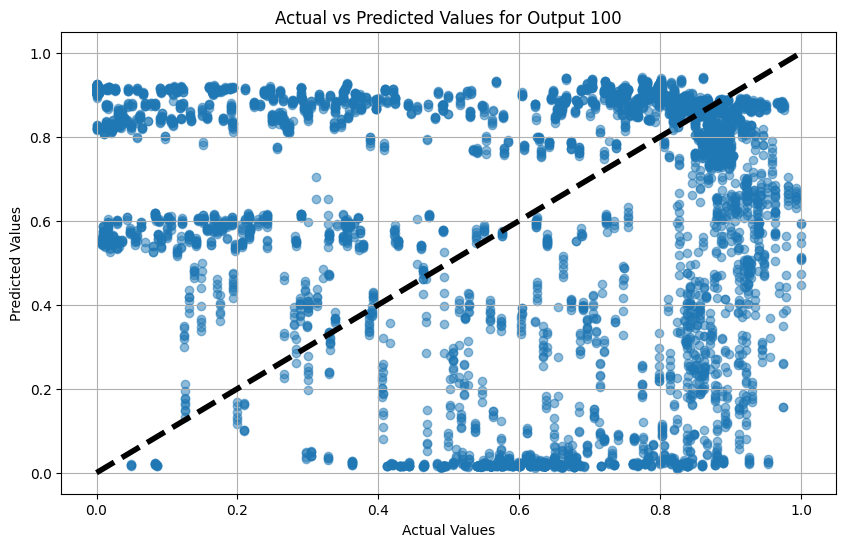

In [81]:
import matplotlib.pyplot as plt

# Output 250
plt.figure(figsize=(10, 6))
plt.scatter(sampled_actuals_250, sampled_predictions_250, alpha=0.5)
plt.title('Actual vs Predicted Values for Output 250')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([sampled_actuals_250.min(), sampled_actuals_250.max()], [sampled_actuals_250.min(), sampled_actuals_250.max()], 'k--', lw=4)
plt.show()

# Output 100
plt.figure(figsize=(10, 6))
plt.scatter(sampled_actuals_100, sampled_predictions_100, alpha=0.5)
plt.title('Actual vs Predicted Values for Output 100')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([sampled_actuals_100.min(), sampled_actuals_100.max()], [sampled_actuals_100.min(), sampled_actuals_100.max()], 'k--', lw=4)
plt.show()


In [168]:
TEST=["3_1.tif","3_2.tif","3_3.tif","3_4.tif","3_5.tif","3_6.tif","3_7.tif","3_8.tif","3_9.tif"]

In [169]:
patch_sizes1 = {
    's1': (224, 224),
    's2_10': (224, 224),
    's2_20': (112, 112),
    'gedi': (28, 28)
}
steps = {
    's1': 224,  # 可以调整步长以控制重叠
    's2_10': 224,
    's2_20': 112,
    'gedi': 28
}


In [258]:
SCENE_IDX = 8
s1_image_path = os.path.join(S1_IMAGE_DIR, TEST[SCENE_IDX])
s2_10_image_path = os.path.join(S2_10_IMAGE_DIR,TEST[SCENE_IDX])
s2_20_image_path = os.path.join(S2_20_IMAGE_DIR, TEST[SCENE_IDX])
gedi_image_path = os.path.join(GEDI_IMAGE_DIR,TEST[SCENE_IDX])
            
            
s1_image1 = read_and_preprocess_image(s1_image_path)
s2_10_image1 = read_and_preprocess_image(s2_10_image_path)
s2_20_image1 = read_and_preprocess_image(s2_20_image_path)
gedi_image1 = read_and_preprocess_image(gedi_image_path)

# 组织图像输入
images = {
    's1': s1_image1,
    's2_10': s2_10_image1,
    's2_20': s2_20_image1,
    'gedi': gedi_image1
}


label_250_path = os.path.join(LABEL_250_DIR_normalized, TEST[SCENE_IDX])
label_250 = read_single_band_image(label_250_path)


label_100_path = os.path.join(LABEL_100_DIR_normalized, TEST[SCENE_IDX])
label_100 = read_single_band_image(label_100_path)


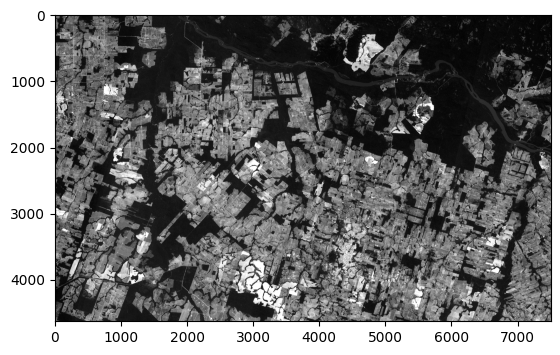

In [259]:
plt.imshow(s2_10_image1[:, :, 0], cmap='gray')
plt.show()


In [260]:

def generate_patches(image, patch_size, step):
    # 生成图像块
    patches = []
    positions = []  # 定义位置列表
    rows = range(0, image.shape[0] - patch_size[0] + 1, step)
    cols = range(0, image.shape[1] - patch_size[1] + 1, step)
    for row in rows:
        for col in cols:
            patch = image[row:row + patch_size[0], col:col + patch_size[1], :]
            patches.append(patch)
            # 计算每个 patch 相对于第一个 patch 的相对位置
            rel_row = row // step + 1
            rel_col = col // step + 1
            positions.append((rel_row, rel_col))  # 记录每个 patch 的相对位置

    return np.array(patches),positions # 返回图像块和位置列表

In [261]:
# def prepare_patches(image, patch_size, step):
#     # 生成补丁
#     image,padding_info=pad_image_to_patch_size(image, patch_size)
#     patches,positions = generate_patches(image, patch_size, step)
    
#     print(patches.shape)
#     return patches,positions,padding_info  # 只取所需数量的补丁


def prepare_patches(image, patch_size, step):
    padded_image, padding_info = pad_image_to_patch_size(image, patch_size)
    patches, positions = generate_patches(padded_image, patch_size, step)
    return patches, positions, padding_info


# 为每种图像准备补丁
patches_s1,positions_s1,padding_info_s1 = prepare_patches(s1_image1, patch_sizes1['s1'], steps['s1'])

patches_10,_,_ = prepare_patches(s2_10_image1, patch_sizes1['s2_10'], steps['s2_10'])

patches_20,_,_ = prepare_patches(s2_20_image1, patch_sizes1['s2_20'], steps['s2_20'])
patches_80,_,_ = prepare_patches(gedi_image1, patch_sizes1['gedi'], steps['gedi'])
#label=pad_image_to_patch_size(label_250, (9,9))
# 使用模型进行预测
prediction = model.predict([patches_s1, patches_10, patches_20, patches_80])


23/23 [==============================] - 5s 214ms/step


In [262]:
# import numpy as np

# def reconstruct_image_from_overlapping_patches(patches, positions, original_shape, patch_size, step):
#     # 创建一个形状与原始图像相同的空数组用于累加结果
#     reconstructed_image = np.zeros(original_shape)
#     # 创建一个相同形状的计数器数组，用于跟踪每个像素的覆盖次数
#     count_matrix = np.zeros(original_shape)

#     # 遍历所有补丁和相应的位置
#     for patch, (rel_row, rel_col) in zip(patches, positions):
#         start_row = (rel_row - 1) * step
#         start_col = (rel_col - 1) * step

#         # 将补丁的内容累加到重建图像的相应位置
#         reconstructed_image[start_row:start_row + patch_size[0], start_col:start_col + patch_size[1]] += patch
#         # 同时更新计数器数组
#         count_matrix[start_row:start_row + patch_size[0], start_col:start_col + patch_size[1]] += 1

#     # 避免除以零，将计数器数组中的零值替换为1
#     count_matrix[count_matrix == 0] = 1

#     # 使用计数器数组归一化累加的结果，以计算平均值
#     reconstructed_image /= count_matrix

#     return reconstructed_image


In [263]:
# # 假设以下变量已根据您的数据设置正确
# # patches, positions = prepare_patches(...) 函数已经生成
# # original_shape 是目标图像的尺寸
# # patch_size 是每个补丁的尺寸
# # step 是步长，定义了补丁之间的重叠
# label_250,_=pad_image_to_patch_size(label_250, (9,9))
# reconstructed_image = reconstruct_image_from_overlapping_patches(
#     prediction[0],  # 假设 prediction[0] 是输出的预测补丁
#     positions_s1,    # 补丁的位置信息
#     label_250.shape, # 原始图像的尺寸
#     (9, 9),          # 补丁的尺寸
#     4                # 假设步长是4，与补丁尺寸的一半
# )


In [264]:
def reconstruct_image_from_patches(patches, positions, padding_info, original_shape, patch_size):
    padded_height, padded_width = padding_info['padded_height'], padding_info['padded_width']
    reconstructed_image = np.zeros((padded_height, padded_width))

    # 遍历所有补丁和位置
    for patch, (rel_row, rel_col) in zip(patches, positions):
        start_row = (rel_row - 1) * patch_size[0]
        start_col = (rel_col - 1) * patch_size[1]

        reconstructed_image[start_row:start_row + patch_size[0], start_col:start_col + patch_size[1]] = patch[..., 0]

    # 裁剪填充过的图像以恢复到原始尺寸
    top_pad, left_pad = padding_info['top_pad'], padding_info['left_pad']
    final_image = reconstructed_image[top_pad:top_pad + original_shape[0], left_pad:left_pad + original_shape[1]]

    return final_image
# 准备补丁和获取填充信息
label_250_padded, padding_info_250 = pad_image_to_patch_size(label_250, (9, 9))
print("Padded shape:", label_250_padded.shape)

# 重建图像
reconstructed = reconstruct_image_from_patches(prediction[0], positions_s1, padding_info_250, label_250.shape, (9, 9))
print("Reconstructed shape:", reconstructed.shape)


Padded shape: (189, 306, 1)
Reconstructed shape: (185, 300)


In [265]:
print(label_250.shape)

(185, 300, 1)


In [266]:
# #step = patch_size
# def reconstruct_image_from_patches(patches, positions, padded_shape, original_shape, patch_size):
#     # 创建一个形状与原始图像相同的空数组
#     reconstructed_image = np.zeros(original_shape)
    
#     # 遍历所有补丁和相应的位置
#     for patch, (rel_row, rel_col) in zip(patches, positions):
#         # 计算补丁在原始图像中的实际起始位置
#         start_row = (rel_row - 1) * patch_size[0]
#         start_col = (rel_col - 1) * patch_size[1]

#         # 将补丁的内容放入重建图像的相应位置
#         reconstructed_image[start_row:start_row + patch_size[0], 
#                            start_col:start_col + patch_size[1]] = patch
#     top_pad, left_pad = original_shape
#     final_image = reconstructed_image[top_pad: top_pad + original_shape[0], left_pad: left_pad + original_shape[1]]

#     return final_image 
# #label_250,_=pad_image_to_patch_size(label_250, (9,9))
# print(label_250.shape)
# reconstructed =  reconstruct_image_from_patches( prediction[0],positions_s1, (padding_info_s1['padded_height'], padding_info_s1['padded_width']),(label_250.shape[0], label_250.shape[1]), (9,9))


# # label_100,_=pad_image_to_patch_size(label_100, (23,23))
# # print(label_100.shape)
# # print(predictions[1].shape)
# # reconstructed_s1 =  reconstruct_image_from_patches( predictions[1],positions_s1, label_100.shape , (23,23))

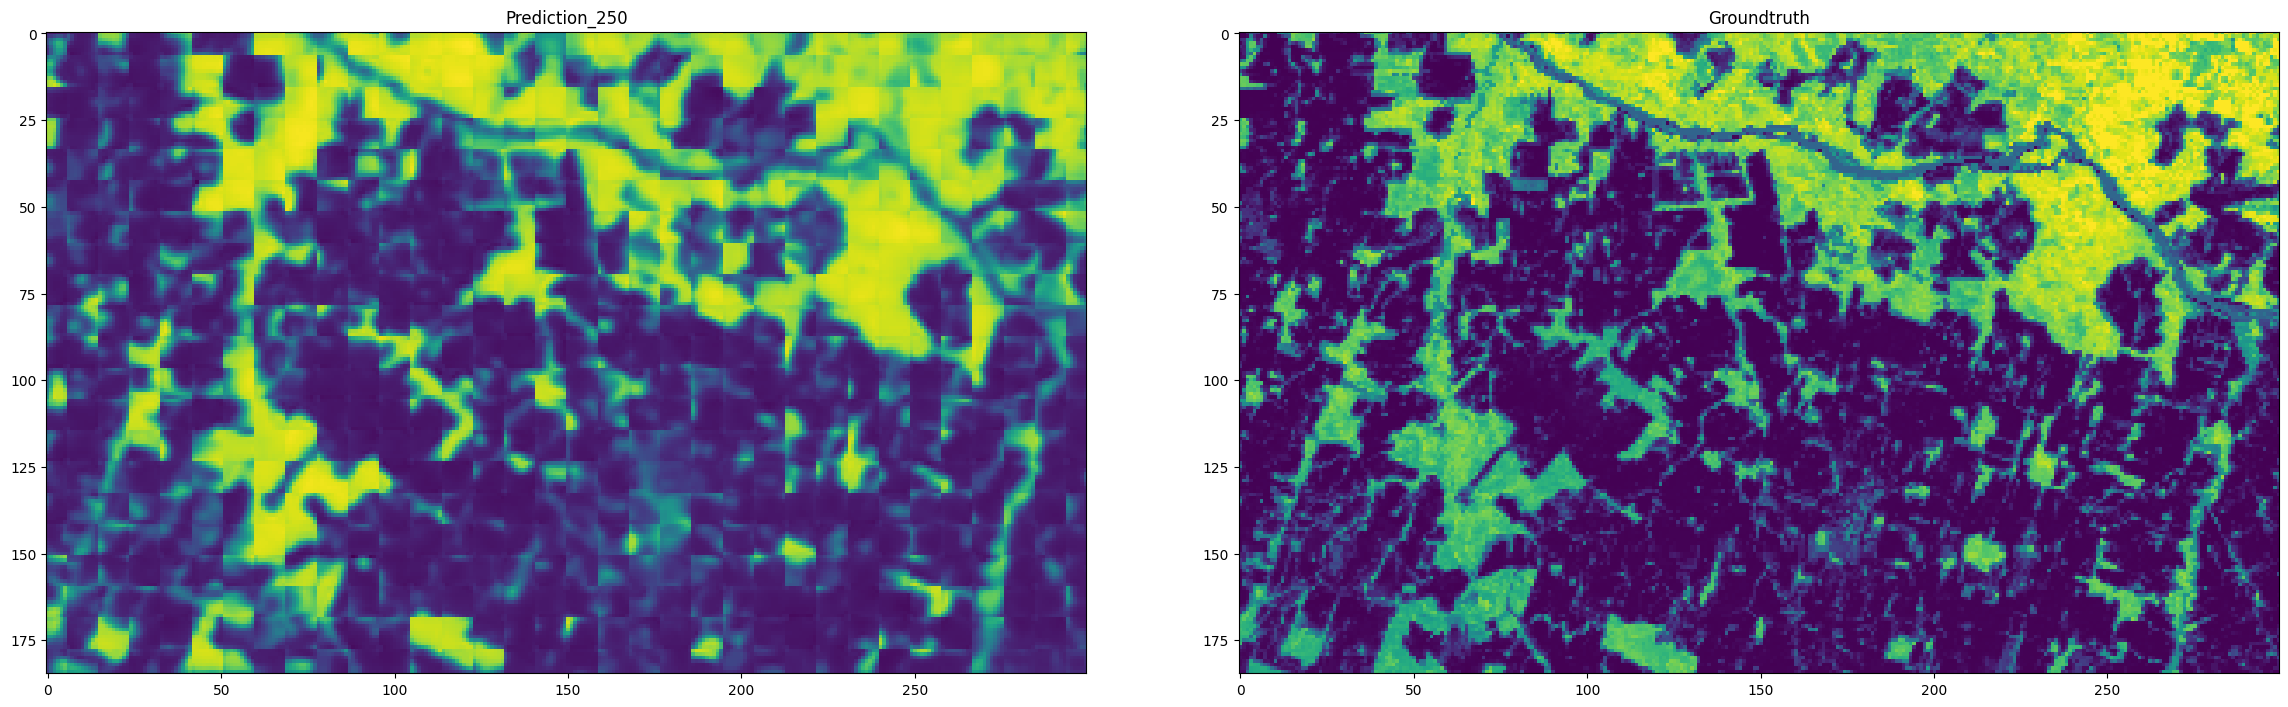

In [267]:


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 7))  # 创建一个包含3个子图的画布




axs[0].imshow(reconstructed)  # 显示第一个输出通道的数据
axs[0].set_title("Prediction_250")

axs[1].imshow(label_250)
axs[1].set_title("Groundtruth")


plt.tight_layout()
plt.show()



In [268]:
import rasterio
from rasterio.transform import from_origin

# 假设 `reconstructed` 是我们重建的图像数组
# `label_250_path` 是原始GeoTIFF图像的路径

# 读取原始图像的地理信息
with rasterio.open(label_250_path) as src:
    transform = src.transform  # 原始图像的变换信息
    crs = src.crs  # 坐标参考系统

# 保存重建的图像
with rasterio.open(
    '3_9.tif',  # 输出文件名
    'w',
    driver='GTiff',  # GeoTIFF格式
    height=reconstructed.shape[0],
    width=reconstructed.shape[1],
    count=1,  # 通道数
    dtype=reconstructed.dtype,
    crs=crs,  # 使用原始图像的坐标参考系统
    transform=transform  # 使用原始图像的变换信息
) as dst:
    dst.write(reconstructed, 1)  # 写入数据到第一个通道
